In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Spatial_hand = pd.read_csv('/Users/emilkoch/Downloads/export-4.csv')


In [3]:
# Replace infinite values with NaN, then fill NaN with 0
Spatial_hand = Spatial_hand.replace([np.inf, -np.inf], np.nan).fillna(0)

In [4]:
Spatial_hand

,MajorLocation_2_0,MinorLocation_2_0,SecondMinorLocation_2_0,SignType_2_0,LexicalClass,CDISemanticCategory,SignBankEnglishTranslations,distance_major_minor,distance_minor_second_minor,angle
0,4,23,24,3,4,11,1329,26.870058,1.414214,3.141592653589793
1,2,26,24,1,4,17,1634,33.941125,2.828427,0
2,4,23,24,4,4,6,656,26.870058,1.414214,3.141592653589793
3,3,17,24,3,4,0,1631,19.798990,9.899495,3.141592653589793
4,4,23,24,4,4,0,723,26.870058,1.414214,3.141592653589793
...,...,...,...,...,...,...,...,...,...,...
2695,3,2,2,3,4,0,700,1.414214,0.000000,[NULL]
2696,4,23,24,4,4,0,700,26.870058,1.414214,3.141592653589793
2697,2,7,17,0,6,0,700,7.071068,14.142136,3.141592653589793
2698,0,0,0,3,4,0,700,0.000000,0.000000,[NULL]


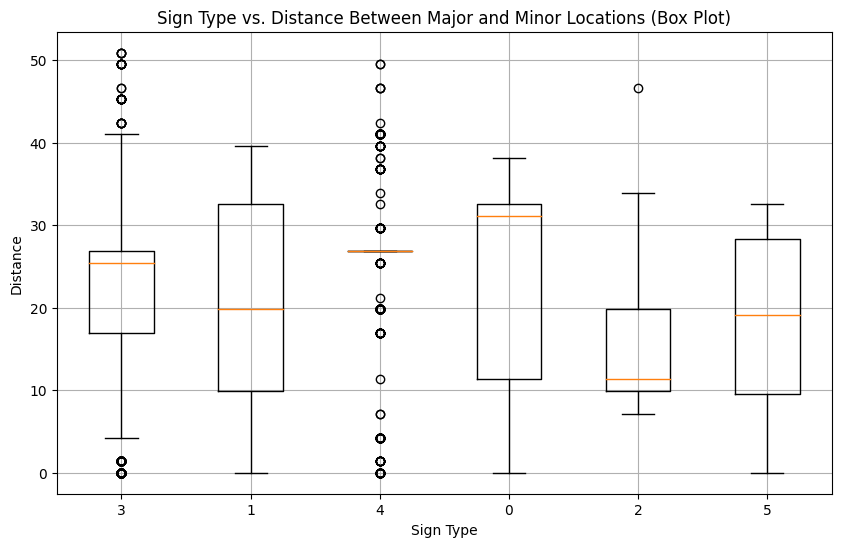

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot([Spatial_hand[Spatial_hand['SignType_2_0'] == i]['distance_major_minor'] for i in Spatial_hand['SignType_2_0'].unique()], labels=Spatial_hand['SignType_2_0'].unique())
plt.title('Sign Type vs. Distance Between Major and Minor Locations (Box Plot)')
plt.xlabel('Sign Type')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [6]:
correlation = Spatial_hand['SignType_2_0'].corr(Spatial_hand['distance_major_minor'])
print("Correlation between Sign Type and Distance:", correlation)


Correlation between Sign Type and Distance: 0.05334577211140373


/var/folders/4r/5qs7726s3_dc54vtgh1sc2740000gn/T/ipykernel_53196/404962805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Spatial_hand.corr()


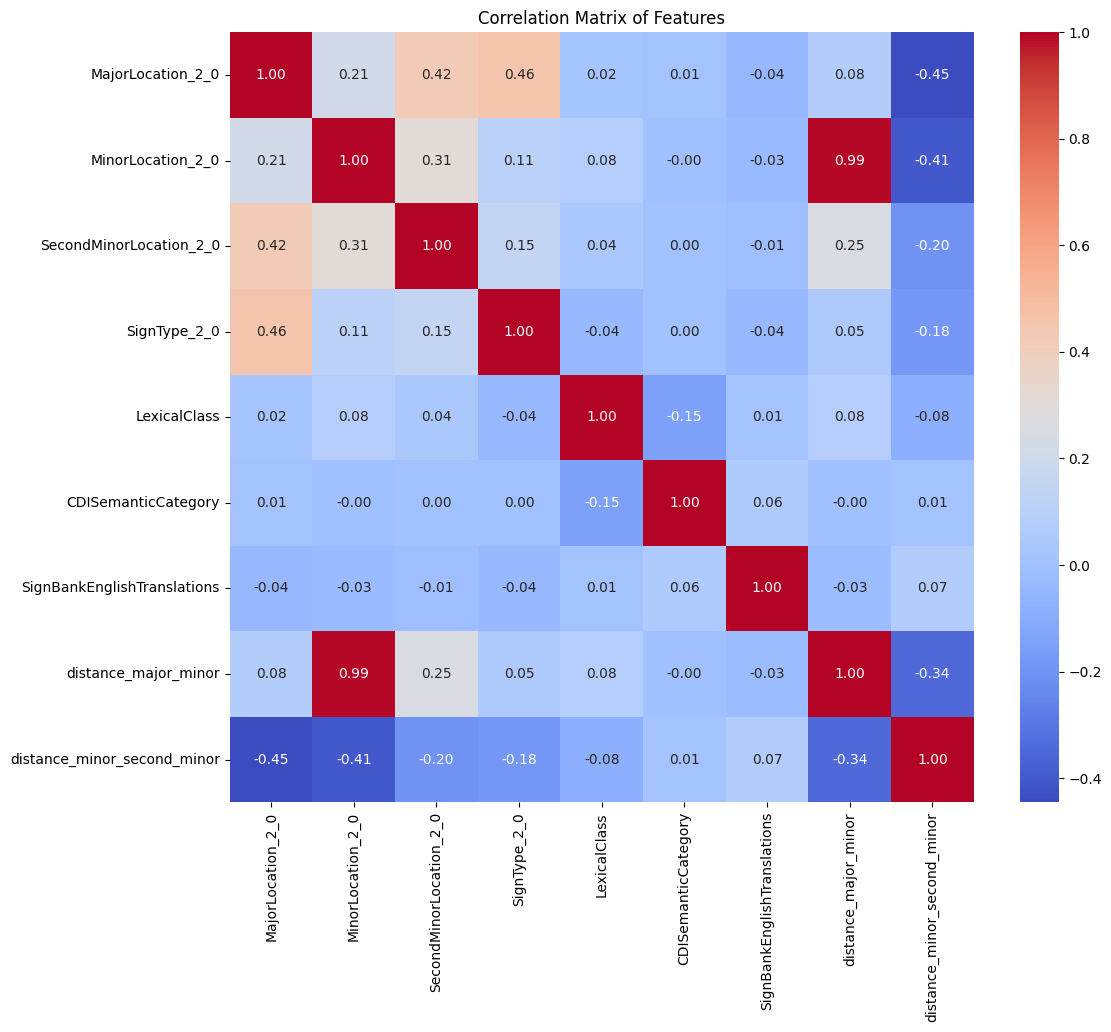

In [7]:
# Compute the correlation matrix
corr_matrix = Spatial_hand.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
# Extract correlations with lexical class and sign type excluding themselves
lexical_class_corr = corr_matrix['LexicalClass'].drop(['LexicalClass', 'SignType_2_0']).sort_values(ascending=False)
sign_type_corr = corr_matrix['SignType_2_0'].drop(['SignType_2_0', 'LexicalClass']).sort_values(ascending=False)

# Print the top correlated features
print("Top features correlated with Lexical Class:")
print(lexical_class_corr.head())

print("\nTop features correlated with Sign Type:")
print(sign_type_corr.head())


Top features correlated with Lexical Class:
MinorLocation_2_0              0.083624
distance_major_minor           0.080872
SecondMinorLocation_2_0        0.044291
MajorLocation_2_0              0.023177
SignBankEnglishTranslations    0.008463
Name: LexicalClass, dtype: float64

Top features correlated with Sign Type:
MajorLocation_2_0          0.460999
SecondMinorLocation_2_0    0.150977
MinorLocation_2_0          0.111428
distance_major_minor       0.053346
CDISemanticCategory        0.004785
Name: SignType_2_0, dtype: float64


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X = Spatial_hand[['MinorLocation_2_0', 'distance_major_minor', 'SecondMinorLocation_2_0', 'MajorLocation_2_0']]
y = Spatial_hand['LexicalClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming LexicalClass has 7 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


2024-03-10 17:06:00.897906: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
54/54 [==============================] - 2s 9ms/step - loss: 1.7404 - accuracy: 0.3391 - val_loss: 1.4521 - val_accuracy: 0.4537
Epoch 2/50
54/54 [==============================] - 0s 5ms/step - loss: 1.4408 - accuracy: 0.4433 - val_loss: 1.3437 - val_accuracy: 0.4537
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 1.4041 - accuracy: 0.4416 - val_loss: 1.3346 - val_accuracy: 0.4537
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3819 - accuracy: 0.4497 - val_loss: 1.3276 - val_accuracy: 0.4537
Epoch 5/50
54/54 [==============================] - 0s 5ms/step - loss: 1.3815 - accuracy: 0.4439 - val_loss: 1.3243 - val_accuracy: 0.4583
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3622 - accuracy: 0.4381 - val_loss: 1.3195 - val_accuracy: 0.4537
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3523 - accuracy: 0.4485 - val_loss: 1.3174 - val_accuracy: 0.4537
Epoch 8/50
54/54 [==

In [10]:
X_1 = Spatial_hand[['MajorLocation_2_0', 'SecondMinorLocation_2_0', 'MinorLocation_2_0', 'distance_major_minor']]
y_1 = Spatial_hand['SignType_2_0']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 2s 11ms/step - loss: 1.6053 - accuracy: 0.3490 - val_loss: 1.2941 - val_accuracy: 0.5069
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 1.2748 - accuracy: 0.4728 - val_loss: 1.1161 - val_accuracy: 0.4884
Epoch 3/50
54/54 [==============================] - 0s 5ms/step - loss: 1.1903 - accuracy: 0.4722 - val_loss: 1.0636 - val_accuracy: 0.5370
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1805 - accuracy: 0.4792 - val_loss: 1.0351 - val_accuracy: 0.5903
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 1.1285 - accuracy: 0.4971 - val_loss: 1.0073 - val_accuracy: 0.6204
Epoch 6/50
54/54 [==============================] - 0s 6ms/step - loss: 1.1057 - accuracy: 0.5185 - val_loss: 0.9921 - val_accuracy: 0.6366
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.5573 - val_loss: 0.9748 - val_accuracy: 0.6551
Epoch 8/50
54/54 [=

In [12]:
# Correctly read the CSV file and assign it to the variable movement_variability
movement_variability = pd.read_csv('/Users/emilkoch/Downloads/export-5.csv')

In [24]:
movement_variability 

,LemmaID,Spread_2_0,UlnarRotation_2_0,FlexionChange_2_0,RepeatedMovement_2_0,MarkedHandshape_2_0,Handshape_2_0,distance_Spread_Ulnar,distance_Spread_Flexion,distance_Flexion_Ulnar
0,2434,1.980922,2.25347,-0.492759,1.114898,-1.008483,3,0.385441,4.269622,3.884181
1,1535,-0.504816,-0.44376,-0.492759,1.114898,0.991589,25,0.086345,4.956558,4.870212
2,1052,-0.504816,-0.44376,-0.492759,-0.896943,-1.008483,11,0.086345,3.542344,3.455999
3,1519,-0.504816,2.25347,-0.492759,1.114898,0.991589,30,3.900804,4.956558,1.055753
4,356,1.980922,-0.44376,2.029389,1.114898,0.991589,19,3.429018,0.026981,3.455999
...,...,...,...,...,...,...,...,...,...,...
2695,2241,1.980922,-0.44376,-0.492759,1.114898,0.991589,19,3.429018,0.026981,3.455999
2696,238,-0.504816,-0.44376,-0.492759,-0.896943,-1.008483,50,0.086345,6.370771,6.284426
2697,2439,-0.504816,-0.44376,2.029389,-0.896943,0.991589,48,0.086345,4.956558,4.870212
2698,1842,-0.504816,2.25347,-0.492759,1.114898,0.991589,7,3.900804,0.713917,3.186887


In [51]:
columns_to_add = ['MajorLocation_2_0', 'distance_major_minor', 'SecondMinorLocation_2_0', 'MinorLocation_2_0', 'distance_minor_second_minor', 'angle', 'CDISemanticCategory', 'LexicalClass', 'SignType_2_0']

for col in columns_to_add:
    movement_variability[col] = Spatial_hand[col]

In [52]:
movement_variability

,LemmaID,Spread_2_0,UlnarRotation_2_0,FlexionChange_2_0,RepeatedMovement_2_0,MarkedHandshape_2_0,Handshape_2_0,distance_Spread_Ulnar,distance_Spread_Flexion,distance_Flexion_Ulnar,...,Neighborhood_Density_2_0,Parameter_Neighborhood_Density_2_0,PhonotacticProbability,Phonological_Complexity,euclidean_distance_sd_nd,euclidean_distance_pp_sd,euclidean_distance_pp_pc,CDISemanticCategory,LexicalClass,SignType_2_0
0,2434,1.980922,2.25347,-0.492759,1.114898,-1.008483,3,0.385441,4.269622,3.884181,...,-0.134285,-0.558978,0.425572,-0.924238,0.142681,0.702538,1.349810,11,4,3
1,1535,-0.504816,-0.44376,-0.492759,1.114898,0.991589,25,0.086345,4.956558,4.870212,...,0.000297,0.785962,0.286619,-0.924238,0.277263,0.563585,1.210858,17,4,1
2,1052,-0.504816,-0.44376,-0.492759,-0.896943,-1.008483,11,0.086345,3.542344,3.455999,...,0.807788,1.435013,2.376696,0.066199,1.084754,2.653662,2.310497,6,4,4
3,1519,-0.504816,2.25347,-0.492759,1.114898,0.991589,30,3.900804,4.956558,1.055753,...,-0.672613,-0.358241,-1.461866,0.066199,0.395647,1.184900,1.528065,0,4,3
4,356,1.980922,-0.44376,2.029389,1.114898,0.991589,19,3.429018,0.026981,3.455999,...,-0.538031,1.200819,0.654264,0.066199,0.261065,0.931230,0.588066,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2241,1.980922,-0.44376,-0.492759,1.114898,0.991589,19,3.429018,0.026981,3.455999,...,-0.672613,-1.435531,-0.393669,1.056636,0.395647,0.116703,1.450305,0,4,3
2696,238,-0.504816,-0.44376,-0.492759,-0.896943,-1.008483,50,0.086345,6.370771,6.284426,...,1.615279,1.675897,0.535576,0.066199,1.892245,0.812542,0.469377,0,4,4
2697,2439,-0.504816,-0.44376,2.029389,-0.896943,0.991589,48,0.086345,4.956558,4.870212,...,-0.672613,-0.732950,-1.363442,2.047073,0.395647,1.086476,3.410515,0,6,0
2698,1842,-0.504816,2.25347,-0.492759,1.114898,0.991589,7,3.900804,0.713917,3.186887,...,-0.403449,-1.549282,-2.304266,0.066199,0.126483,2.027300,2.370465,0,4,3


<Figure size 1000x600 with 0 Axes>

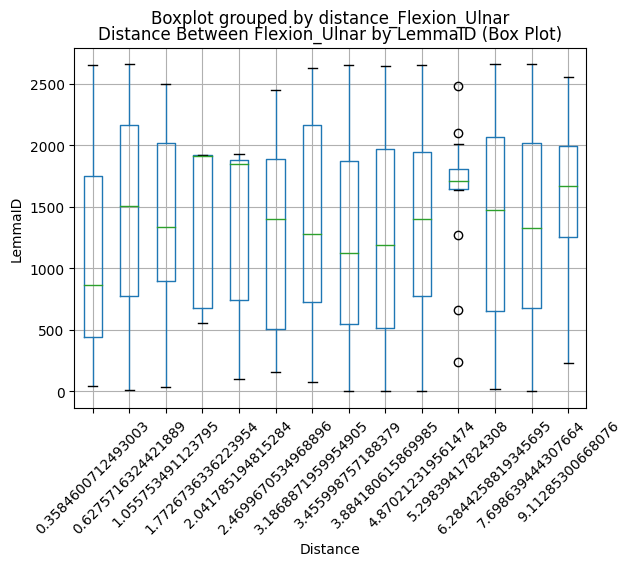

In [28]:
plt.figure(figsize=(10, 6))
movement_variability.boxplot(column='LemmaID', by='distance_Flexion_Ulnar')
plt.title('Distance Between Flexion_Ulnar by LemmaID (Box Plot)')
plt.xlabel('Distance')
plt.ylabel('LemmaID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/4r/5qs7726s3_dc54vtgh1sc2740000gn/T/ipykernel_53196/258285570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movement_variability.corr()


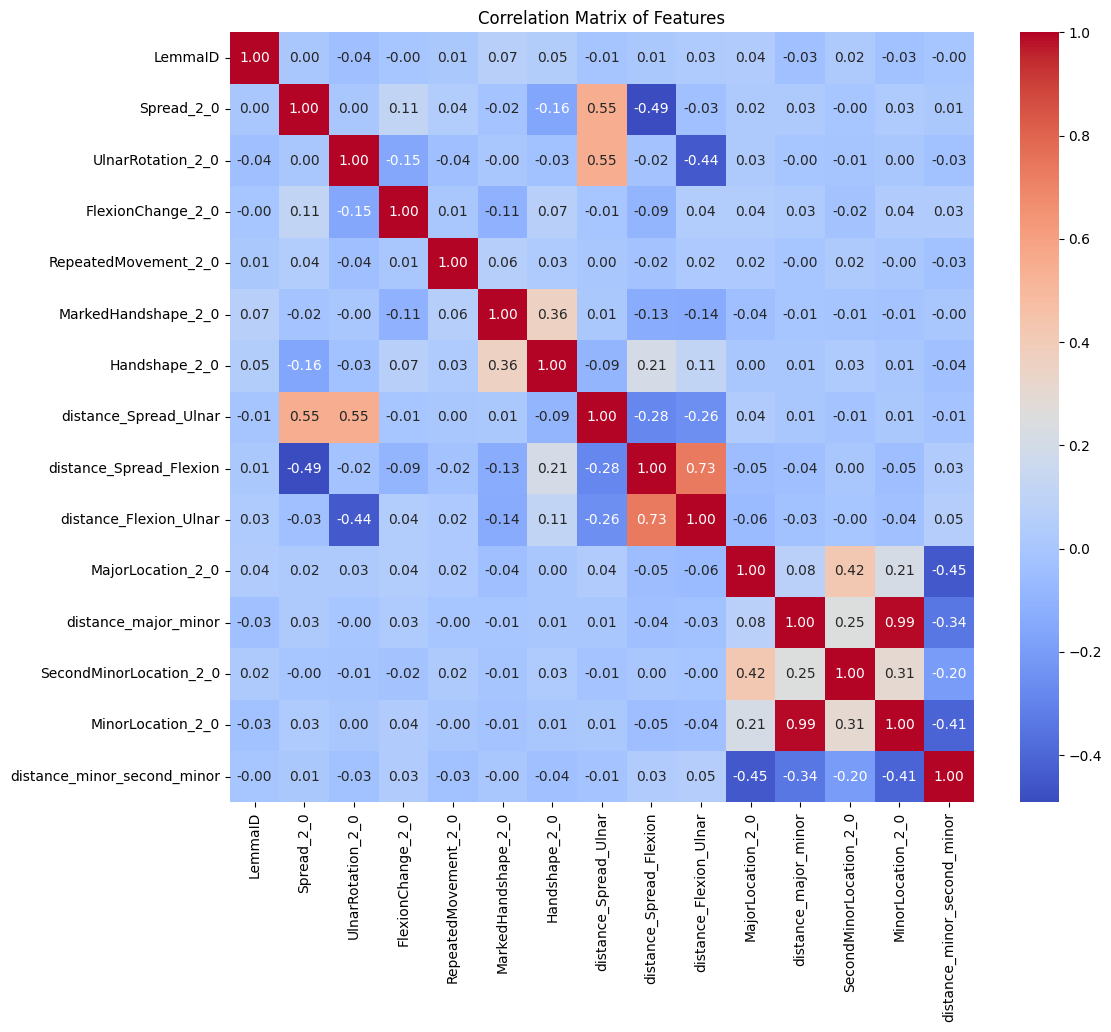

In [33]:
# Compute the correlation matrix
corr_matrix = movement_variability.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [36]:
handshape_type_corr = corr_matrix['Handshape_2_0'].drop(['Handshape_2_0']).sort_values(ascending=False)

print("\nTop features correlated with handshape:")
print(handshape_type_corr.head())


Top features correlated with handshape:
MarkedHandshape_2_0        0.360087
distance_Spread_Flexion    0.207218
distance_Flexion_Ulnar     0.112274
FlexionChange_2_0          0.065846
LemmaID                    0.046272
Name: Handshape_2_0, dtype: float64


In [42]:
X_2 = movement_variability[['distance_Spread_Flexion', 'distance_Flexion_Ulnar', 'FlexionChange_2_0', 'Spread_2_0']]
y_2 = movement_variability['Handshape_2_0']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(58, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 2s 12ms/step - loss: 3.8944 - accuracy: 0.0741 - val_loss: 3.6298 - val_accuracy: 0.1435
Epoch 2/50
54/54 [==============================] - 0s 5ms/step - loss: 3.3543 - accuracy: 0.1591 - val_loss: 3.0448 - val_accuracy: 0.2500
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 3.0475 - accuracy: 0.1840 - val_loss: 2.7618 - val_accuracy: 0.2662
Epoch 4/50
54/54 [==============================] - 0s 5ms/step - loss: 2.8646 - accuracy: 0.2141 - val_loss: 2.5886 - val_accuracy: 0.2639
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 2.7040 - accuracy: 0.2332 - val_loss: 2.4840 - val_accuracy: 0.2894
Epoch 6/50
54/54 [==============================] - 0s 6ms/step - loss: 2.6416 - accuracy: 0.2245 - val_loss: 2.4174 - val_accuracy: 0.2894
Epoch 7/50
54/54 [==============================] - 0s 5ms/step - loss: 2.5744 - accuracy: 0.2251 - val_loss: 2.3613 - val_accuracy: 0.2917
Epoch 8/50
54/54 [=

In [45]:
Neighbors = pd.read_csv('/Users/emilkoch/Downloads/export-6.csv')

In [46]:
Neighbors

,SpreadChange_2_0,Neighborhood_Density_2_0,Parameter_Neighborhood_Density_2_0,PhonotacticProbability,Phonological_Complexity,euclidean_distance_sd_nd,euclidean_distance_pp_sd,euclidean_distance_pp_pc
0,-0.276966,-0.134285,-0.558978,0.425572,-0.924238,0.142681,0.702538,1.349810
1,-0.276966,0.000297,0.785962,0.286619,-0.924238,0.277263,0.563585,1.210858
2,-0.276966,0.807788,1.435013,2.376696,0.066199,1.084754,2.653662,2.310497
3,-0.276966,-0.672613,-0.358241,-1.461866,0.066199,0.395647,1.184900,1.528065
4,-0.276966,-0.538031,1.200819,0.654264,0.066199,0.261065,0.931230,0.588066
...,...,...,...,...,...,...,...,...
2695,-0.276966,-0.672613,-1.435531,-0.393669,1.056636,0.395647,0.116703,1.450305
2696,-0.276966,1.615279,1.675897,0.535576,0.066199,1.892245,0.812542,0.469377
2697,-0.276966,-0.672613,-0.732950,-1.363442,2.047073,0.395647,1.086476,3.410515
2698,-0.276966,-0.403449,-1.549282,-2.304266,0.066199,0.126483,2.027300,2.370465


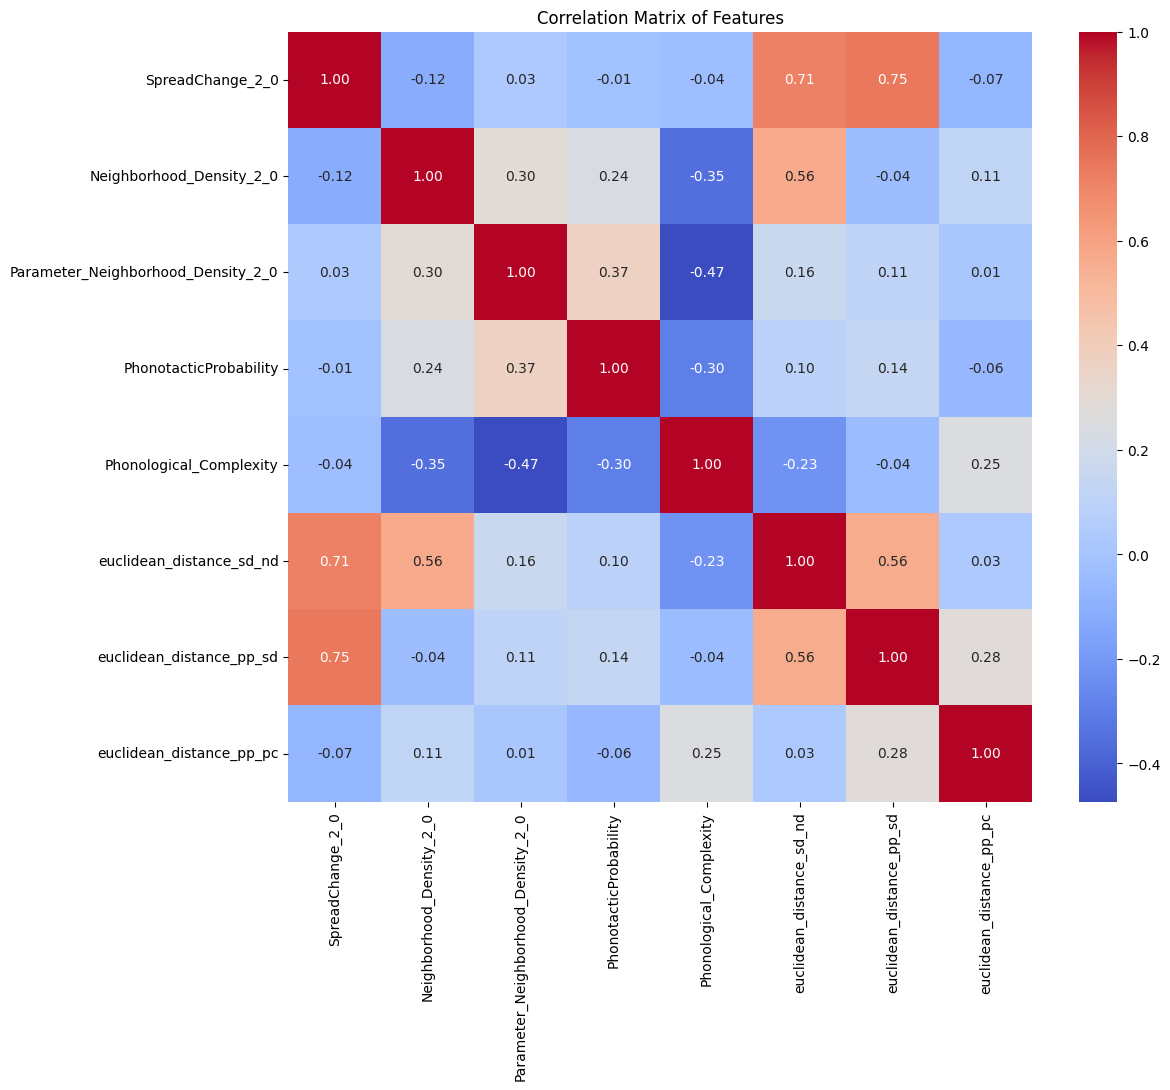

In [47]:
# Compute the correlation matrix
corr_matrix = Neighbors.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [48]:
columns_to_add = ['SpreadChange_2_0', 'Neighborhood_Density_2_0', 'Parameter_Neighborhood_Density_2_0', 'PhonotacticProbability', 'Phonological_Complexity', 'euclidean_distance_sd_nd', 'euclidean_distance_pp_sd','euclidean_distance_pp_pc']

for col in columns_to_add:
    movement_variability[col] = Neighbors[col]

In [49]:
movement_variability

,LemmaID,Spread_2_0,UlnarRotation_2_0,FlexionChange_2_0,RepeatedMovement_2_0,MarkedHandshape_2_0,Handshape_2_0,distance_Spread_Ulnar,distance_Spread_Flexion,distance_Flexion_Ulnar,...,distance_minor_second_minor,angle,SpreadChange_2_0,Neighborhood_Density_2_0,Parameter_Neighborhood_Density_2_0,PhonotacticProbability,Phonological_Complexity,euclidean_distance_sd_nd,euclidean_distance_pp_sd,euclidean_distance_pp_pc
0,2434,1.980922,2.25347,-0.492759,1.114898,-1.008483,3,0.385441,4.269622,3.884181,...,1.414214,3.141592653589793,-0.276966,-0.134285,-0.558978,0.425572,-0.924238,0.142681,0.702538,1.349810
1,1535,-0.504816,-0.44376,-0.492759,1.114898,0.991589,25,0.086345,4.956558,4.870212,...,2.828427,0,-0.276966,0.000297,0.785962,0.286619,-0.924238,0.277263,0.563585,1.210858
2,1052,-0.504816,-0.44376,-0.492759,-0.896943,-1.008483,11,0.086345,3.542344,3.455999,...,1.414214,3.141592653589793,-0.276966,0.807788,1.435013,2.376696,0.066199,1.084754,2.653662,2.310497
3,1519,-0.504816,2.25347,-0.492759,1.114898,0.991589,30,3.900804,4.956558,1.055753,...,9.899495,3.141592653589793,-0.276966,-0.672613,-0.358241,-1.461866,0.066199,0.395647,1.184900,1.528065
4,356,1.980922,-0.44376,2.029389,1.114898,0.991589,19,3.429018,0.026981,3.455999,...,1.414214,3.141592653589793,-0.276966,-0.538031,1.200819,0.654264,0.066199,0.261065,0.931230,0.588066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2241,1.980922,-0.44376,-0.492759,1.114898,0.991589,19,3.429018,0.026981,3.455999,...,0.000000,[NULL],-0.276966,-0.672613,-1.435531,-0.393669,1.056636,0.395647,0.116703,1.450305
2696,238,-0.504816,-0.44376,-0.492759,-0.896943,-1.008483,50,0.086345,6.370771,6.284426,...,1.414214,3.141592653589793,-0.276966,1.615279,1.675897,0.535576,0.066199,1.892245,0.812542,0.469377
2697,2439,-0.504816,-0.44376,2.029389,-0.896943,0.991589,48,0.086345,4.956558,4.870212,...,14.142136,3.141592653589793,-0.276966,-0.672613,-0.732950,-1.363442,2.047073,0.395647,1.086476,3.410515
2698,1842,-0.504816,2.25347,-0.492759,1.114898,0.991589,7,3.900804,0.713917,3.186887,...,0.000000,[NULL],-0.276966,-0.403449,-1.549282,-2.304266,0.066199,0.126483,2.027300,2.370465


/var/folders/4r/5qs7726s3_dc54vtgh1sc2740000gn/T/ipykernel_53196/258285570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movement_variability.corr()


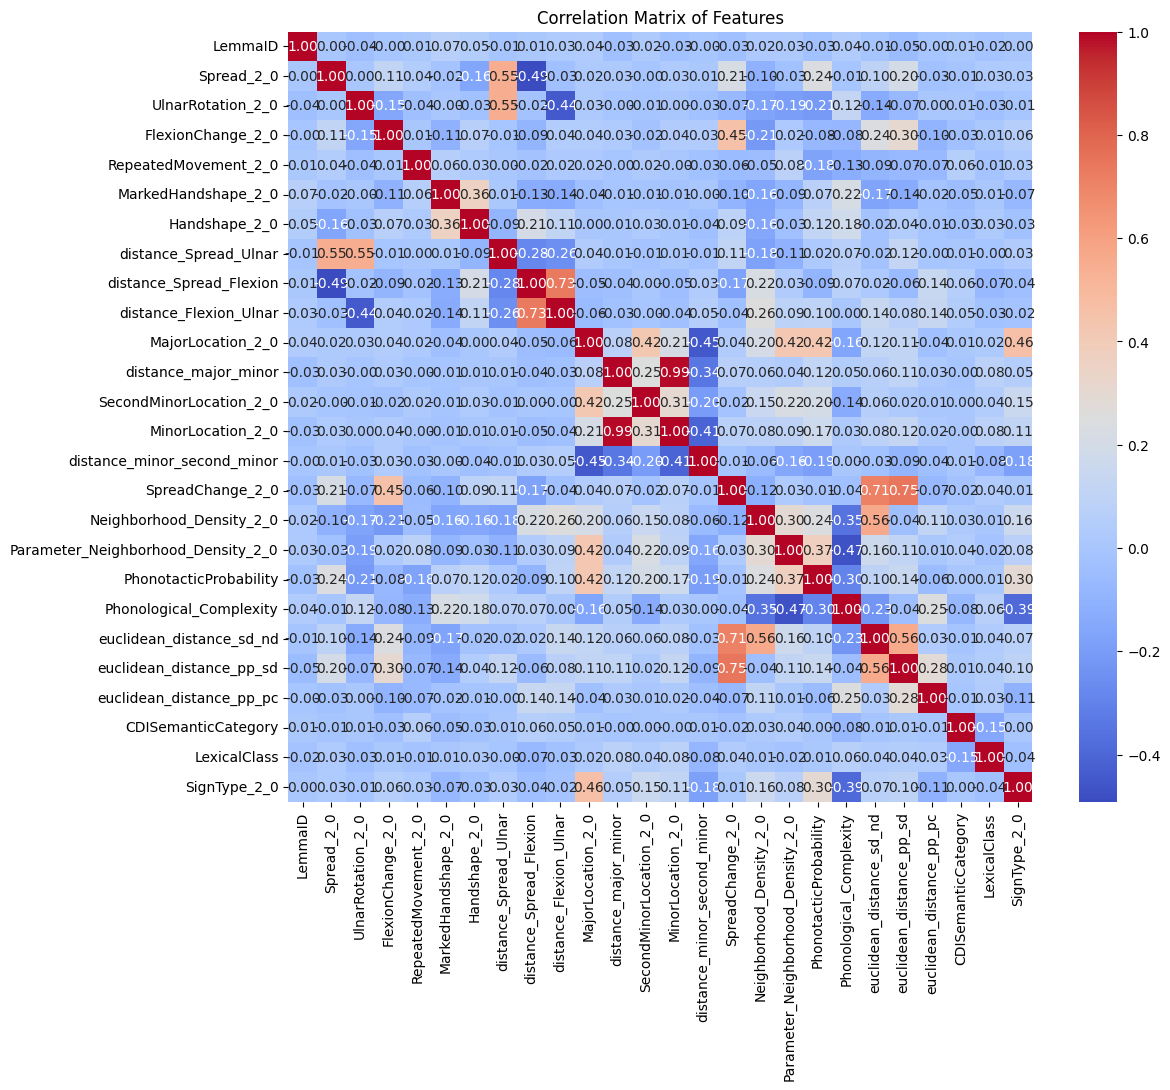

In [53]:
# Compute the correlation matrix
corr_matrix = movement_variability.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [61]:
# Extract correlations with lexical class and sign type excluding themselves
lexical_class_corr = corr_matrix['LexicalClass'].drop(['LexicalClass']).sort_values(ascending=False)
sign_type_corr = corr_matrix['SignType_2_0'].drop(['SignType_2_0']).sort_values(ascending=False)
lemmaid_type_corr = corr_matrix['LemmaID'].drop(['LemmaID']).sort_values(ascending=False)
handshape_type_corr = corr_matrix['Handshape_2_0'].drop(['Handshape_2_0', 'MarkedHandshape_2_0']).sort_values(ascending=False)
semantic_category_corr = corr_matrix['CDISemanticCategory'].drop(['CDISemanticCategory']).sort_values(ascending=False)

# Print the top correlated features
print("Top features correlated with Lexical Class:")
print(lexical_class_corr.head())

print("\nTop features correlated with Sign Type:")
print(sign_type_corr.head())

print("\nTop features correlated with LemmaID:")
print(lemmaid_type_corr.head())

print("\nTop features correlated with Handshape:")
print(handshape_type_corr.head())

print("\nTop features correlated with Semantic Category:")
print(semantic_category_corr.head())


Top features correlated with Lexical Class:
MinorLocation_2_0           0.083624
distance_major_minor        0.080872
Phonological_Complexity     0.062234
euclidean_distance_pp_sd    0.044930
SecondMinorLocation_2_0     0.044291
Name: LexicalClass, dtype: float64

Top features correlated with Sign Type:
MajorLocation_2_0           0.460999
PhonotacticProbability      0.296709
Neighborhood_Density_2_0    0.158645
SecondMinorLocation_2_0     0.150977
MinorLocation_2_0           0.111428
Name: SignType_2_0, dtype: float64

Top features correlated with LemmaID:
MarkedHandshape_2_0        0.067943
Handshape_2_0              0.046272
MajorLocation_2_0          0.038146
Phonological_Complexity    0.035218
distance_Flexion_Ulnar     0.027523
Name: LemmaID, dtype: float64

Top features correlated with Handshape:
distance_Spread_Flexion    0.207218
Phonological_Complexity    0.178838
PhonotacticProbability     0.118986
distance_Flexion_Ulnar     0.112274
SpreadChange_2_0           0.089684
Name:

In [58]:
X_1_1 = movement_variability[['MinorLocation_2_0', 'distance_major_minor', 'SecondMinorLocation_2_0', 'Phonological_Complexity', 'euclidean_distance_pp_sd']]
y_1_1 = movement_variability['LexicalClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1_1, y_1_1, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming LexicalClass has 7 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 3s 10ms/step - loss: 1.7861 - accuracy: 0.2836 - val_loss: 1.4336 - val_accuracy: 0.4630
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 1.4386 - accuracy: 0.4282 - val_loss: 1.3270 - val_accuracy: 0.4630
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3786 - accuracy: 0.4479 - val_loss: 1.3159 - val_accuracy: 0.4630
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3680 - accuracy: 0.4537 - val_loss: 1.3139 - val_accuracy: 0.4560
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3566 - accuracy: 0.4462 - val_loss: 1.3093 - val_accuracy: 0.4537
Epoch 6/50
54/54 [==============================] - 0s 5ms/step - loss: 1.3444 - accuracy: 0.4444 - val_loss: 1.3090 - val_accuracy: 0.4699
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3426 - accuracy: 0.4491 - val_loss: 1.3088 - val_accuracy: 0.4630
Epoch 8/50
54/54 [=

In [60]:
X_1_2 = movement_variability[['MajorLocation_2_0', 'SecondMinorLocation_2_0', 'MinorLocation_2_0', 'PhonotacticProbability', 'Neighborhood_Density_2_0']]
y_1_2 = movement_variability['SignType_2_0']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1_2, y_1_2, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 2s 8ms/step - loss: 1.6578 - accuracy: 0.3154 - val_loss: 1.3152 - val_accuracy: 0.5093
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3486 - accuracy: 0.4404 - val_loss: 1.1373 - val_accuracy: 0.5139
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 1.2583 - accuracy: 0.4531 - val_loss: 1.0738 - val_accuracy: 0.5440
Epoch 4/50
54/54 [==============================] - 0s 5ms/step - loss: 1.2076 - accuracy: 0.4688 - val_loss: 1.0448 - val_accuracy: 0.5741
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1629 - accuracy: 0.4884 - val_loss: 1.0187 - val_accuracy: 0.6065
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1456 - accuracy: 0.5104 - val_loss: 1.0020 - val_accuracy: 0.6227
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1079 - accuracy: 0.5226 - val_loss: 0.9825 - val_accuracy: 0.6319
Epoch 8/50
54/54 [==

In [63]:
X_2_2 = movement_variability[['distance_Spread_Flexion', 'Phonological_Complexity', 'PhonotacticProbability', 'distance_Flexion_Ulnar', 'Spread_2_0']]
y_2_2 = movement_variability['Handshape_2_0']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2_2, y_2_2, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(58, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 7s 9ms/step - loss: 3.8252 - accuracy: 0.0828 - val_loss: 3.5055 - val_accuracy: 0.3125
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 3.2835 - accuracy: 0.2060 - val_loss: 2.9068 - val_accuracy: 0.3773
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 2.9185 - accuracy: 0.2627 - val_loss: 2.5677 - val_accuracy: 0.3819
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 2.7101 - accuracy: 0.2841 - val_loss: 2.3621 - val_accuracy: 0.4074
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 2.5563 - accuracy: 0.2876 - val_loss: 2.2249 - val_accuracy: 0.4120
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 2.4721 - accuracy: 0.3113 - val_loss: 2.1222 - val_accuracy: 0.4144
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 2.3811 - accuracy: 0.3466 - val_loss: 2.0494 - val_accuracy: 0.4421
Epoch 8/50
54/54 [==

In [81]:
X_3 = movement_variability[['MarkedHandshape_2_0', 'Handshape_2_0', 'MajorLocation_2_0', 'Phonological_Complexity', 'distance_Flexion_Ulnar', 'euclidean_distance_pp_sd', 'UlnarRotation_2_0', 'distance_major_minor', 'SpreadChange_2_0', 'MinorLocation_2_0', 'SecondMinorLocation_2_0']]
y_3 = movement_variability['LemmaID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2663, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 3s 15ms/step - loss: 7.9200 - accuracy: 0.0000e+00 - val_loss: 7.9396 - val_accuracy: 0.0000e+00
Epoch 2/50
54/54 [==============================] - 0s 8ms/step - loss: 7.7943 - accuracy: 0.0017 - val_loss: 8.0962 - val_accuracy: 0.0000e+00
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 7.5551 - accuracy: 0.0064 - val_loss: 8.5975 - val_accuracy: 0.0000e+00
Epoch 4/50
54/54 [==============================] - 0s 7ms/step - loss: 7.1762 - accuracy: 0.0046 - val_loss: 9.2051 - val_accuracy: 0.0000e+00
Epoch 5/50
54/54 [==============================] - 0s 7ms/step - loss: 6.8180 - accuracy: 0.0116 - val_loss: 9.6763 - val_accuracy: 0.0000e+00
Epoch 6/50
54/54 [==============================] - 0s 8ms/step - loss: 6.5729 - accuracy: 0.0064 - val_loss: 10.0443 - val_accuracy: 0.0000e+00
Epoch 7/50
54/54 [==============================] - 0s 9ms/step - loss: 6.3946 - accuracy: 0.0098 - val_loss: 10.4303 - val_accura

In [91]:
X_4 = movement_variability[['RepeatedMovement_2_0', 'distance_Spread_Flexion', 'distance_Flexion_Ulnar', 'Parameter_Neighborhood_Density_2_0', 'Neighborhood_Density_2_0', 'MarkedHandshape_2_0', 'Phonological_Complexity', 'LexicalClass']]
y_4 = movement_variability['LemmaID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2663, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 2s 12ms/step - loss: 7.9133 - accuracy: 0.0000e+00 - val_loss: 7.9388 - val_accuracy: 0.0000e+00
Epoch 2/50
54/54 [==============================] - 0s 8ms/step - loss: 7.7954 - accuracy: 0.0012 - val_loss: 8.1009 - val_accuracy: 0.0000e+00
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 7.5401 - accuracy: 0.0064 - val_loss: 8.6490 - val_accuracy: 0.0000e+00
Epoch 4/50
54/54 [==============================] - 0s 7ms/step - loss: 7.1521 - accuracy: 0.0041 - val_loss: 9.3370 - val_accuracy: 0.0000e+00
Epoch 5/50
54/54 [==============================] - 0s 7ms/step - loss: 6.8029 - accuracy: 0.0046 - val_loss: 9.8123 - val_accuracy: 0.0000e+00
Epoch 6/50
54/54 [==============================] - 1s 10ms/step - loss: 6.5331 - accuracy: 0.0098 - val_loss: 10.2761 - val_accuracy: 0.0000e+00
Epoch 7/50
54/54 [==============================] - 0s 7ms/step - loss: 6.3558 - accuracy: 0.0122 - val_loss: 10.7244 - val_accur